Device is :cpu
Loaded the models


100%|██████████| 20/20 [07:08<00:00, 21.40s/it]


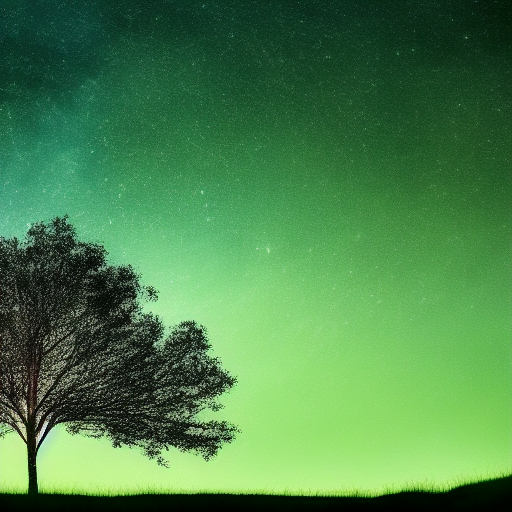

In [5]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif(torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Device is :{DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json",
                          merges_file="../data/tokenizer_merges.txt")

model_file = "../data/v1-5-pruned-emaonly.ckpt"

models = model_loader.preload_models_from_standard_weights(model_file,DEVICE)
print("Loaded the models")

## Text to image

prompt = ("A picture of a tree in the night with stars behind him on a hill ,highly detailed, cinematic, 8k resolution, realistic,real, sharp")

uncond_prompt ="" # nothing

do_cfg = True
cfg_scale = 7  # min: 1, max: 14

## Image to Image
input_image = None
image_path = "../images/test_1.jpg"
#input_image = Image.open(image_path)

strength = 0.9
sampler = "ddpm"
num_inference_steps = 20
seed = 36
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    cfg_scale=cfg_scale,
    do_cfg=True,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)